In [53]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [54]:
# %load helpers.py
"""some helper functions for project 1."""
import csv
import numpy as np


def load_csv_data(data_path, sub_sample=False):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y=='b')] = -1

    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids


def predict_labels(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= 0)] = -1
    y_pred[np.where(y_pred > 0)] = 1

    return y_pred


def create_csv_submission(ids, y_pred, name):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})


In [55]:
y, x, ids = load_csv_data('data/train.csv')

# Raw Data

*"How much data dowe have in total?"*

In [56]:
print("- There are {} data points in the dataset".format(x.shape[0]))
print("- There are {} features in x".format(x.shape[1]))

- There are 250000 data points in the dataset
- There are 30 features in x


In [92]:
def describe_features(x):
    mean_x = np.nanmean(x, axis=0)
    var_x = np.nanvar(x, axis=0)
    max_x = np.nanmax(x, axis=0)
    min_x = np.nanmin(x, axis=0)
#     nan_x = np.sum(np.isnan(x), axis=0)
    
    print('ID |    Mean    |    Var     |    Min     |    Max     |   #NaN   |')
    print('---|------------|------------|------------|------------|----------|')
    
    for f in range(0, x.shape[1]):
        mean = '{0:.3f}'.format(mean_x[f]).rjust(10)
        var = '{0:.3f}'.format(var_x[f]).rjust(10)
        maxi = '{0:.3f}'.format(max_x[f]).rjust(10)
        mini = '{0:.3f}'.format(min_x[f]).rjust(10)
#         nani = str(nan_x[f]).rjust(8)
        identifier = str(f).rjust(2)
    
        print('{} | {} | {} | {} | {} |'.format(identifier, mean, var, mini, maxi))


*"What does the data look like?"*

In [93]:
describe_features(x)

ID |    Mean    |    Var     |    Min     |    Max     |   #NaN   |
---|------------|------------|------------|------------|----------|
 0 |    -49.023 | 165116.124 |   -999.000 |   1192.026 |
 1 |     49.240 |   1249.256 |      0.000 |    690.075 |
 2 |     81.182 |   1666.975 |      6.329 |   1349.351 |
 3 |     57.896 |   4052.030 |      0.000 |   2834.999 |
 4 |   -708.421 | 206551.758 |   -999.000 |      8.503 |
 5 |   -601.237 | 432925.819 |   -999.000 |   4974.979 |
 6 |   -709.357 | 205226.188 |   -999.000 |     16.690 |
 7 |      2.373 |      0.613 |      0.208 |      5.684 |
 8 |     18.917 |    496.107 |      0.000 |   2834.999 |
 9 |    158.432 |  13387.852 |     46.104 |   1852.462 |
10 |      1.438 |      0.714 |      0.047 |     19.773 |
11 |     -0.128 |      1.425 |     -1.414 |      1.414 |
12 |   -708.985 | 205749.162 |   -999.000 |      1.000 |
13 |     38.707 |    502.299 |     20.000 |    764.408 |
14 |     -0.011 |      1.474 |     -2.499 |      2.497 |
15 |     

# Clean Data

In [94]:
def clean_data(x):
    
    # Copy so that we don't touch the original data
    x = x.copy()
    
    # Replace wrong values
    x[x == -999.0] = np.NaN
    
    return x

def count_of_nans(x):
    
    x_clean[:][np.isnan(x_clean[:]) == True].shape[0]

In [95]:
x_clean = clean_data(x)

*"What does the clean data look like?"*

In [96]:
describe_features(x_clean)
# x_clean[np.isnan(x_clean) == False]

ID |    Mean    |    Var     |    Min     |    Max     |   #NaN   |
---|------------|------------|------------|------------|----------|
 0 |    121.859 |   3283.063 |      9.044 |   1192.026 |
 1 |     49.240 |   1249.256 |      0.000 |    690.075 |
 2 |     81.182 |   1666.975 |      6.329 |   1349.351 |
 3 |     57.896 |   4052.030 |      0.000 |   2834.999 |
 4 |      2.404 |      3.035 |      0.000 |      8.503 |
 5 |    371.783 | 158162.573 |     13.602 |   4974.979 |
 6 |     -0.822 |     12.847 |    -18.066 |     16.690 |
 7 |      2.373 |      0.613 |      0.208 |      5.684 |
 8 |     18.917 |    496.107 |      0.000 |   2834.999 |
 9 |    158.432 |  13387.852 |     46.104 |   1852.462 |
10 |      1.438 |      0.714 |      0.047 |     19.773 |
11 |     -0.128 |      1.425 |     -1.414 |      1.414 |
12 |      0.458 |      0.159 |      0.000 |      1.000 |
13 |     38.707 |    502.299 |     20.000 |    764.408 |
14 |     -0.011 |      1.474 |     -2.499 |      2.497 |
15 |     

In [62]:
def histo_feature(data, i, ax=None, b=None):
    
    indexes = ~np.isnan(data[:,i])
    
    if b == None:
        color = 'blue'
    elif b:
        indexes = indexes & (y == 1)
        color='green'
    else:
        indexes = indexes & (y == -1)
        color='red'
        
    if ax ==None:
        ax = plt
    
    ax.hist(data[:,i][indexes], 250, facecolor=color, alpha=0.75)
    
def histo_features(data, b=None):
    fig = plt.figure(figsize = (15,15))
    
    for i in range(0, 30):
        ax = fig.add_subplot(6,5,i+1)
        histo_feature(data, i, ax=ax, b=b)

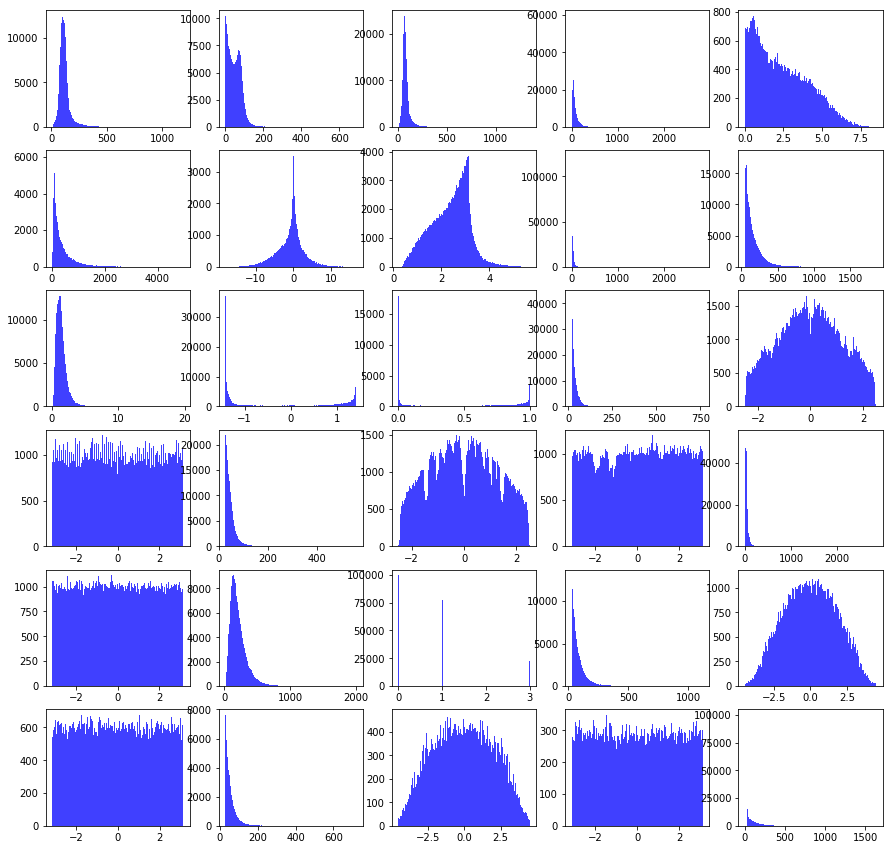

In [64]:
histo_features(x_clean)

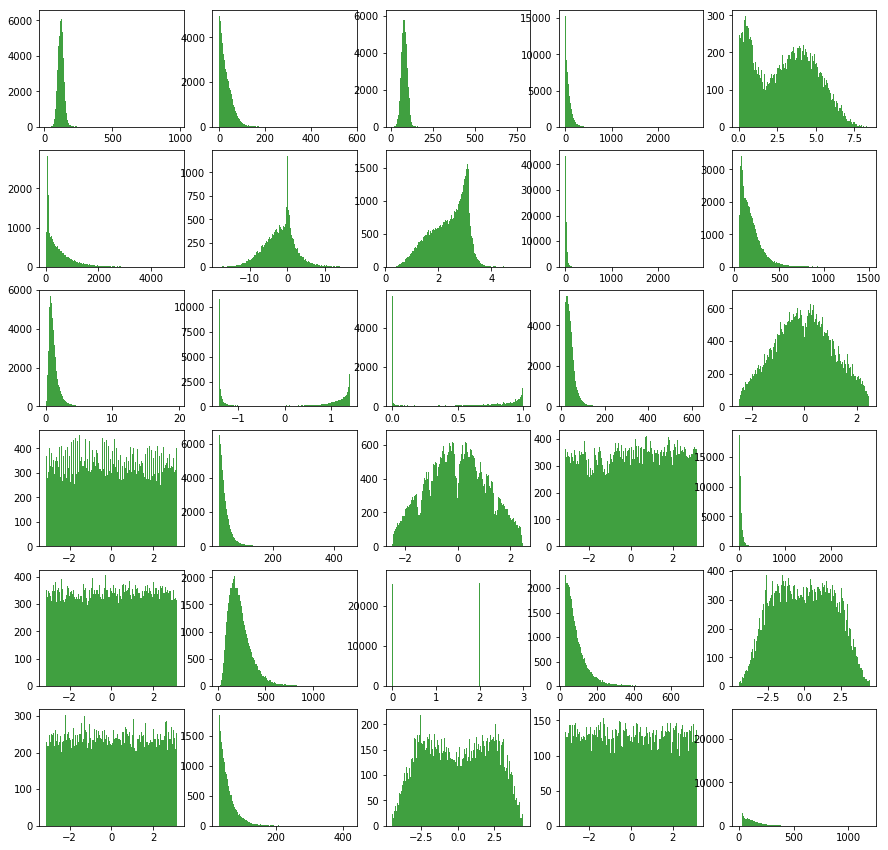

In [65]:
histo_features(x_clean, b=True)

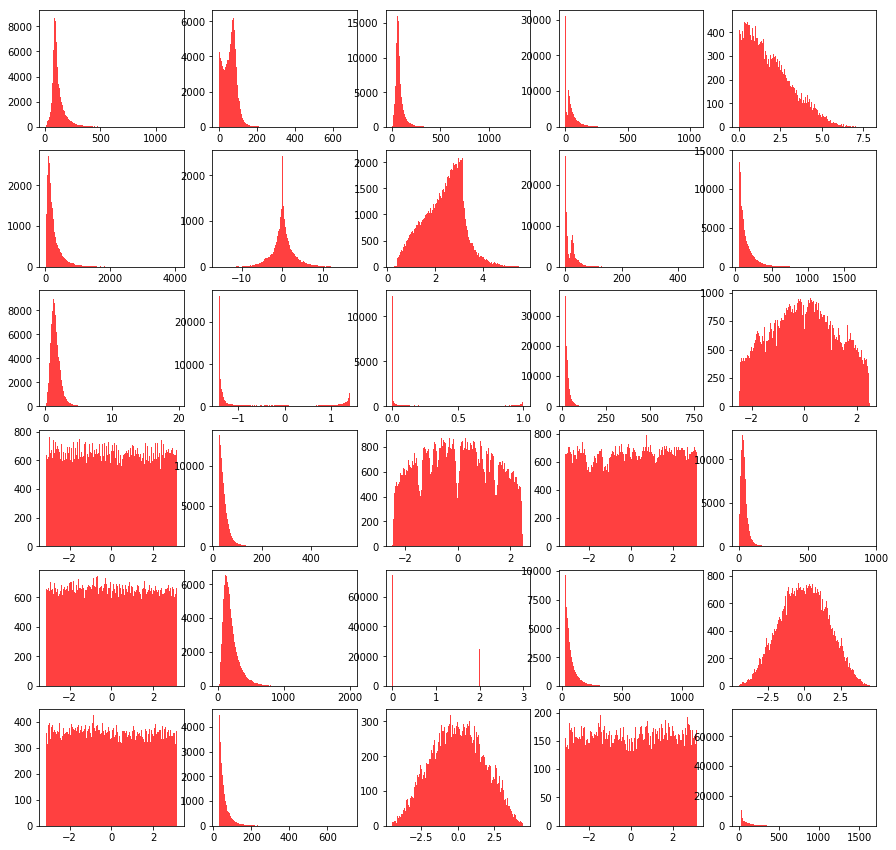

In [66]:
histo_features(x_clean, b=False)

In [67]:
def clamp(data, max_value):
    data[data > max_value] = max_value

def remove_outliers(data):
    data = data.copy()
    clamp(data[:, 0], 500)
    clamp(data[:, 1], 220)
    clamp(data[:, 2], 300)
    clamp(data[:, 3], 320)
    # 4
    clamp(data[:, 5], 2300)
    # 6
    # 7
    clamp(data[:, 8], 100)
    clamp(data[:, 9], 1000)
    clamp(data[:, 10], 6)
    # 11
    # 12
    clamp(data[:, 13], 150)
    # 14
    # 15
    clamp(data[:, 16], 180)
    # 17 
    # 18
    clamp(data[:, 19], 210)
    # 20
    clamp(data[:, 21], 1000)
    # 22
    clamp(data[:, 23], 500)
    # 24
    # 25
    clamp(data[:, 26], 250)
    # 27
    # 28
    clamp(data[:, 29], 500)
    
    return data

In [68]:
x_clamped = remove_outliers(x_clean)

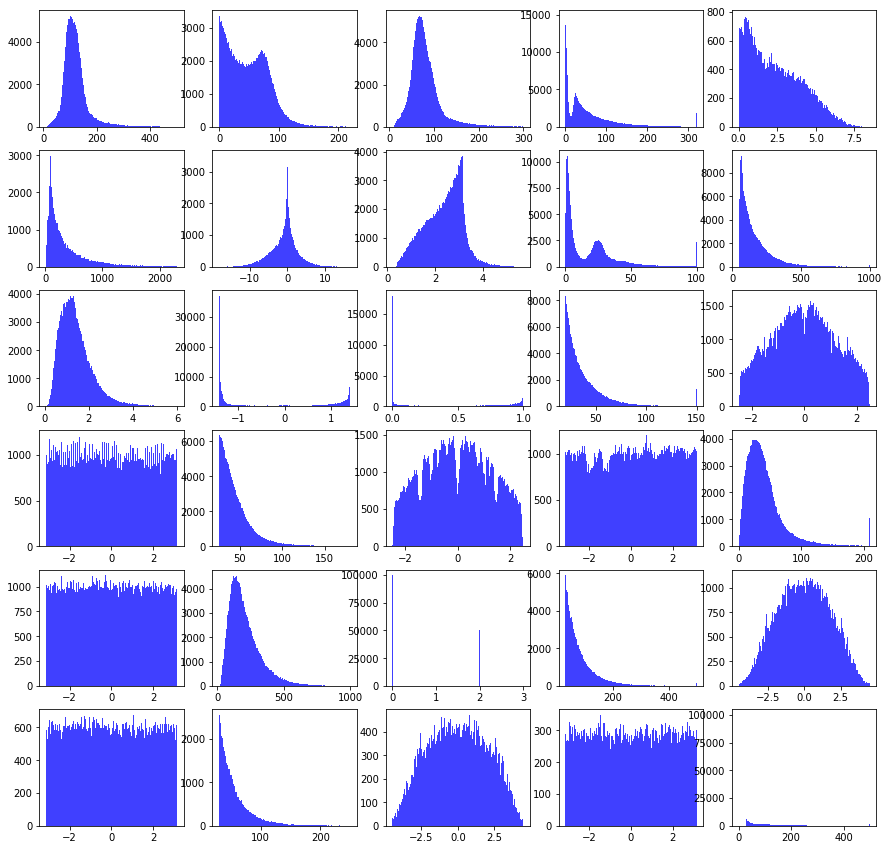

In [69]:
histo_features(x_clamped)

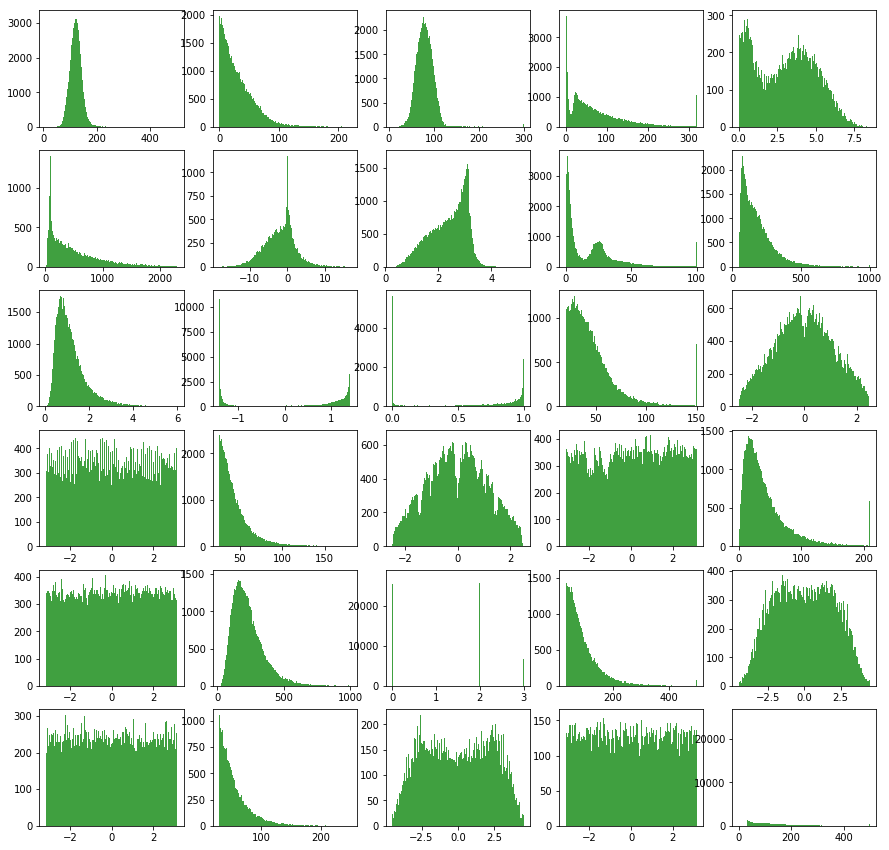

In [70]:
histo_features(x_clamped, b=True)

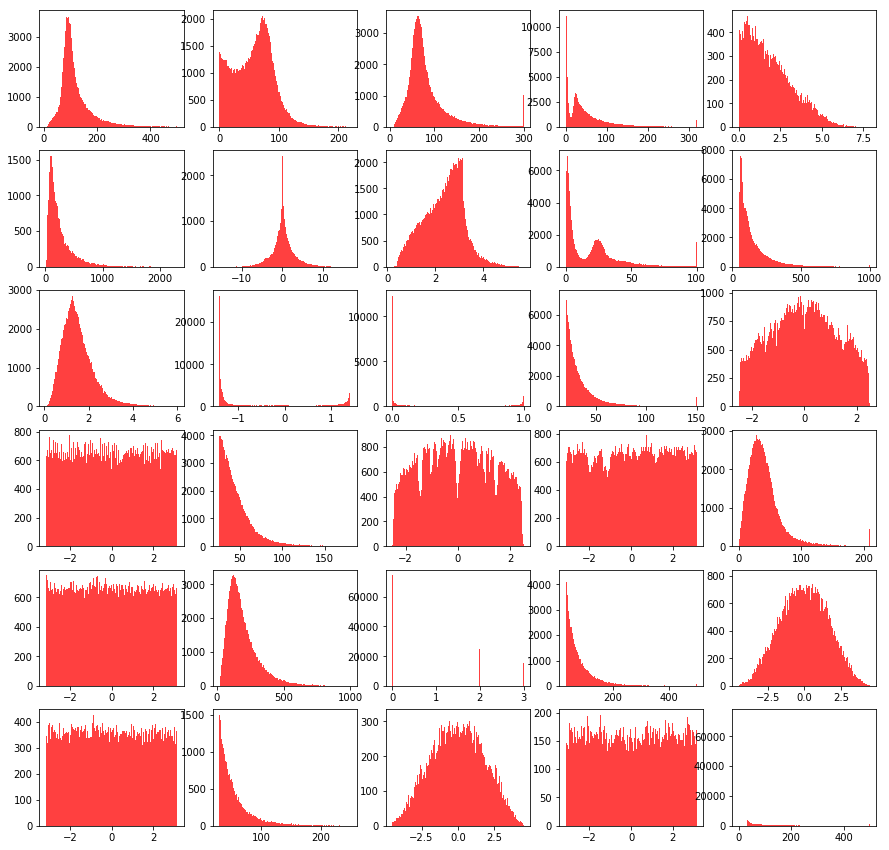

In [71]:
histo_features(x_clamped, b=False)

In [111]:
def compare_features(data):
    fig = plt.figure(figsize = (15,150))
    
    for i in range(0, 60):
        ax = fig.add_subplot(30,2,i+1)
        histo_feature(data, int(i/2.0), ax=ax, b=(i%2==0))

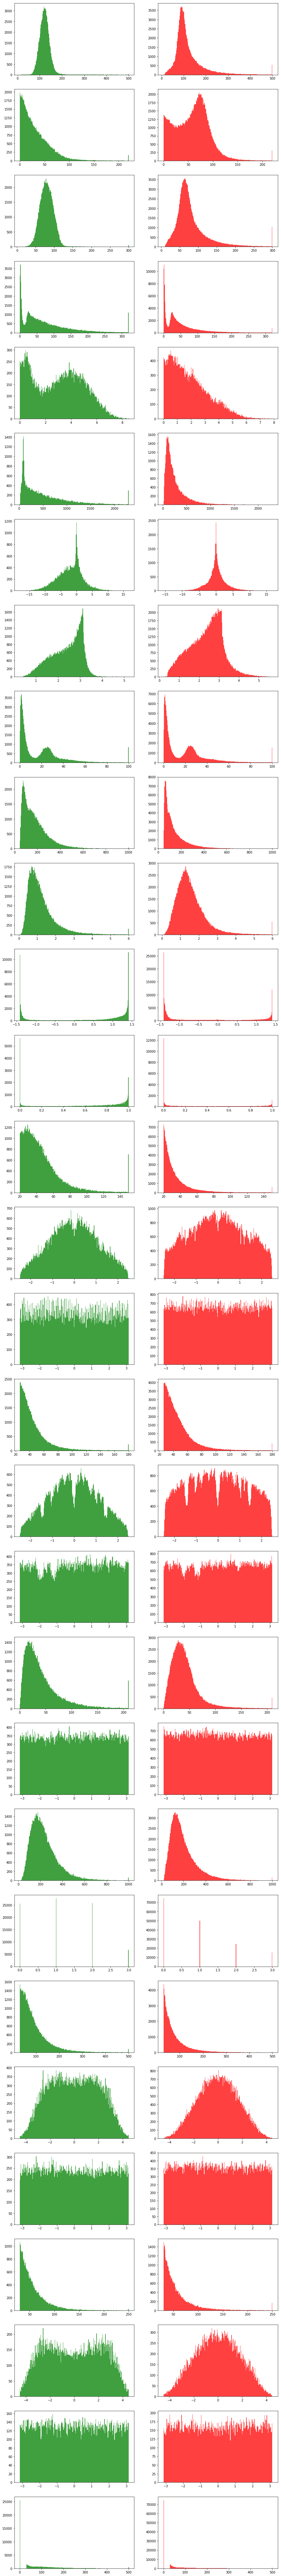

In [112]:
compare_features(x_clamped)